In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import joblib


In [2]:
data = pd.read_csv("Data/main_preprocessed_data.csv")

In [3]:
x = data.drop('State', axis=1)
y = data['State']


In [4]:
def hist_graphs(data):
    ncols = 3
    nrows = (len(data.columns) + (3 - (len(data.columns) % 3))) // 3 - (len(data.columns) % 3 == 0)
    fig = plt.figure(constrained_layout=True, figsize=(10, 10))
    grid = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)
    grid.update(wspace=.1, hspace=.1)
    for i in range(nrows):
        for j in range(ncols - ((1+len(data.columns)) % 3) * (i == (nrows-1))):
            ax = fig.add_subplot(grid[i, j])
            ax.set_title(data.columns[3 * i + j])
            ax.hist(data[data.columns[3 * i + j]])
            ax.axvline(data[data.columns[3 * i + j]].mean(), color='r')
            ax.axvline(np.median(data[data.columns[3 * i + j]]), color='black')


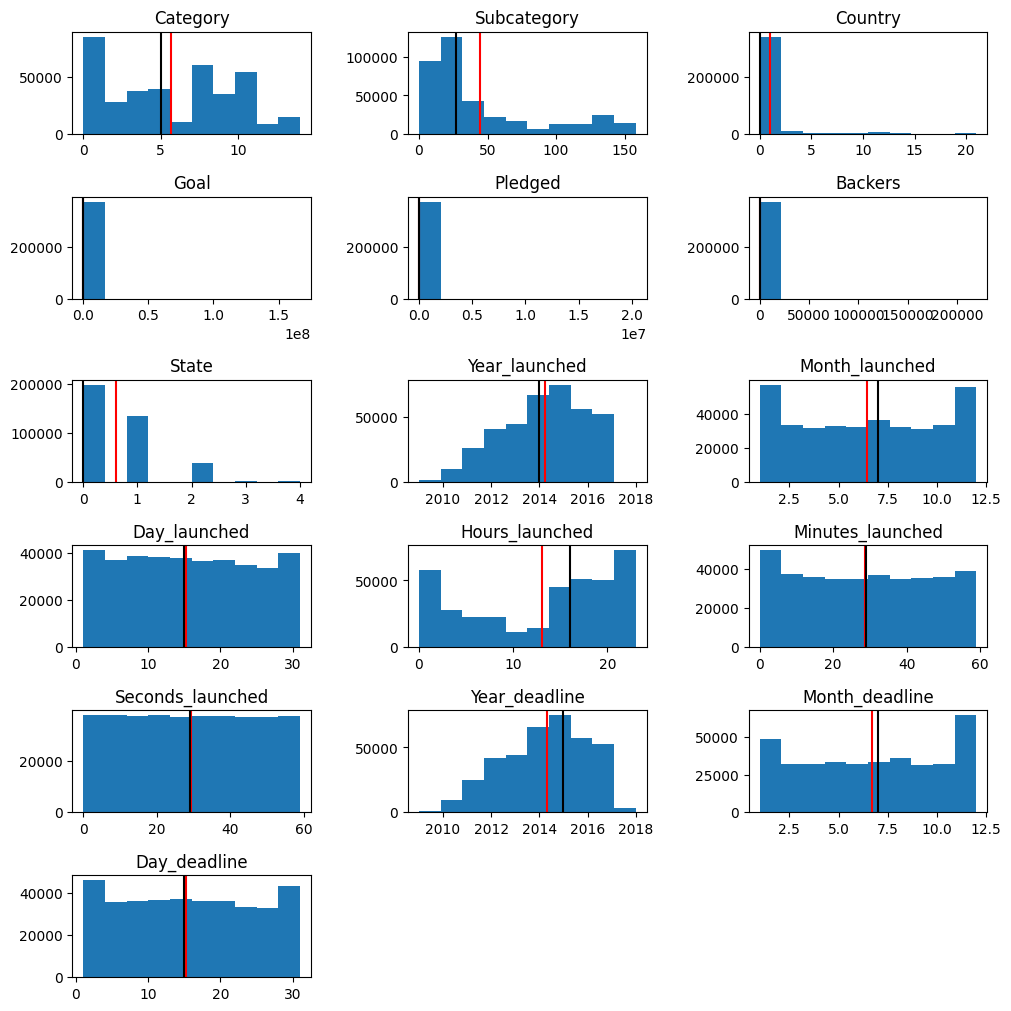

In [5]:
%matplotlib inline
hist_graphs(data)

In [6]:
ss = StandardScaler().fit(x)
ss_data = pd.DataFrame(data=ss.transform(x), columns=x.columns)
ss_data['State'] = y
ss_data

,Category,Subcategory,Country,Goal,Pledged,Backers,Year_launched,Month_launched,Day_launched,Hours_launched,Minutes_launched,Seconds_launched,Year_deadline,Month_deadline,Day_deadline,State
0,-1.444283,-1.020286,-0.327438,-0.038717,-0.093036,-0.084116,-2.713977,-0.740650,0.647675,1.025740,-1.476034,1.073102,-2.750710,-0.516116,1.739182,0
1,-1.188709,-0.997192,-0.327438,0.029459,-0.099639,-0.113731,-2.713977,-0.740650,0.874709,-1.698570,-1.198180,1.361762,-2.750710,0.082462,0.521981,0
2,-0.933134,-0.974098,-0.327438,-0.039562,-0.099497,-0.113731,-2.713977,-0.740650,0.988226,1.025740,1.302508,-1.524832,-2.750710,-0.516116,-1.359149,1
3,-0.677559,-0.951004,-0.327438,-0.039494,-0.098292,-0.089601,-2.713977,-0.740650,1.101743,0.506824,0.413375,-0.485658,-2.750710,0.082462,-0.141947,1
4,-1.444283,-1.020286,-0.327438,-0.037940,-0.095642,-0.106053,-2.713977,-0.740650,1.328777,0.117637,-1.031467,0.553516,-2.750710,-0.516116,1.185909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374848,0.344741,-0.211998,-0.327438,-0.039148,-0.099880,-0.117021,1.946164,-1.642145,-1.509147,0.117637,-0.864755,-1.178441,1.908415,-1.713272,0.079362,4
374849,1.111465,-0.512219,-0.327438,-0.026635,-0.096934,-0.108247,1.946164,-1.642145,-1.509147,0.117637,-0.753613,0.495784,1.908415,-1.413983,-0.695221,4
374850,1.367040,-0.627689,-0.327438,-0.030950,-0.098073,-0.113731,1.946164,-1.642145,-1.509147,0.117637,-0.642471,0.957639,1.908415,-1.713272,0.079362,4
374851,-0.933134,-0.489125,-0.327438,-0.039019,-0.099803,-0.115924,1.946164,-1.642145,-1.509147,0.117637,0.524516,-0.716586,1.908415,-1.413983,-1.580458,4


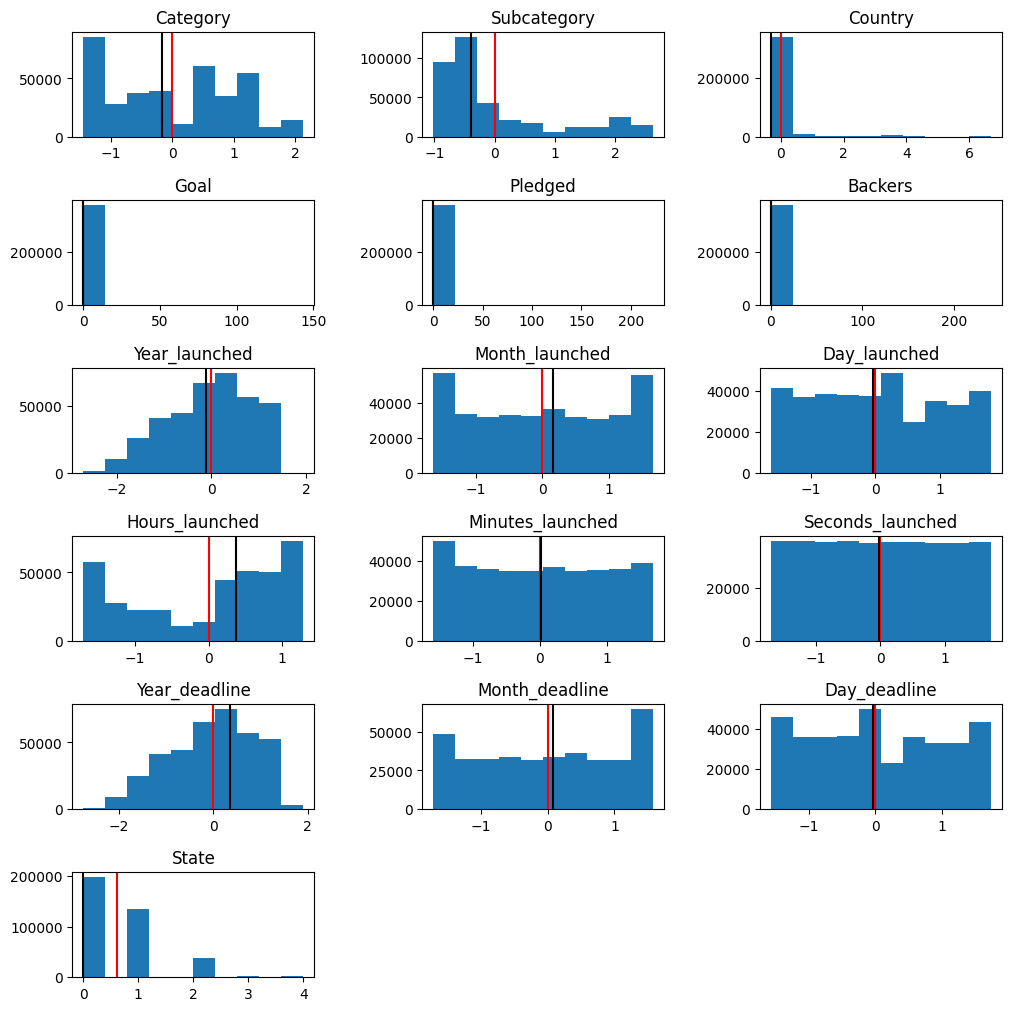

In [7]:
%matplotlib inline
hist_graphs(ss_data)


In [8]:
mm = MinMaxScaler().fit(x)
mm_data = pd.DataFrame(data=mm.transform(x), columns=x.columns)
mm_data['State'] = y


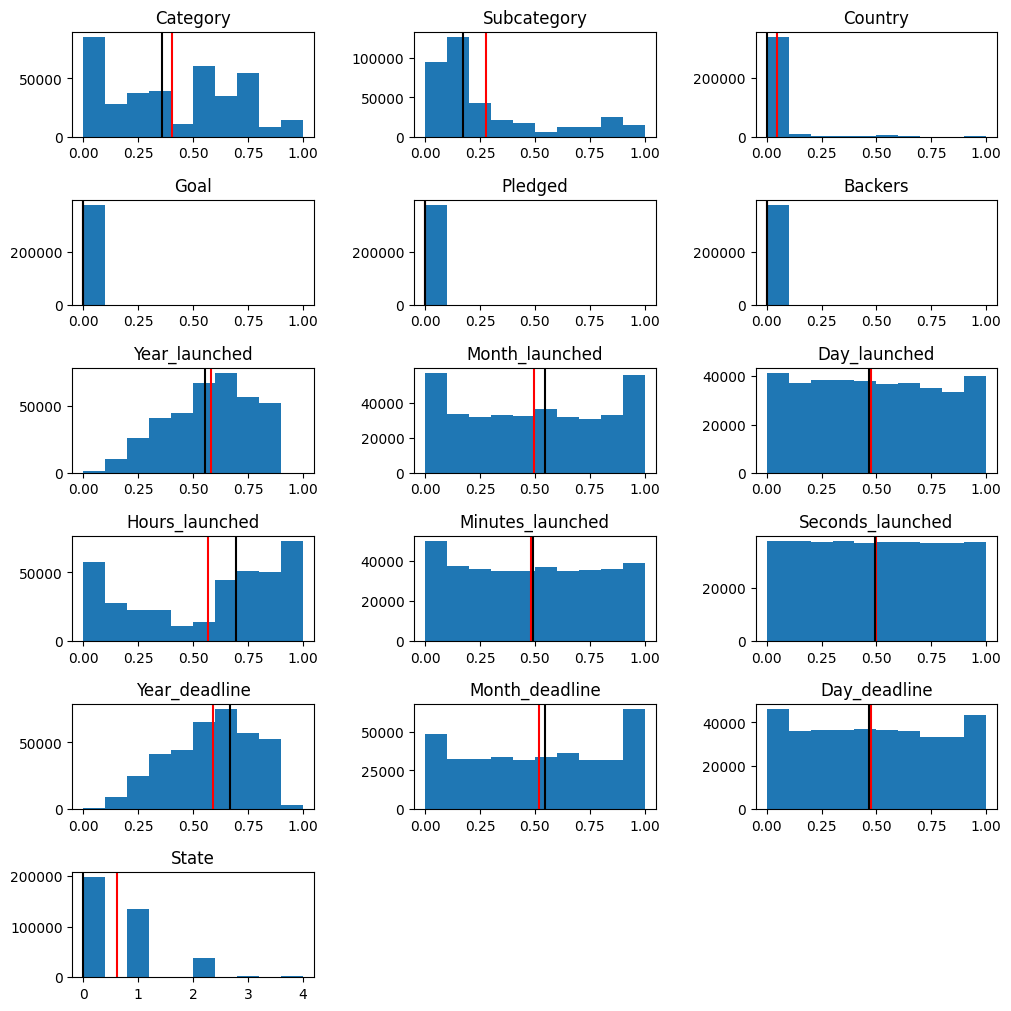

In [9]:
%matplotlib inline
hist_graphs(mm_data)


In [10]:
abs(mm_data.mean(axis=0) - mm_data.median(axis=0)) - abs(ss_data.mean(axis=0) - ss_data.median(axis=0))


Category           -0.119901
Subcategory        -0.288017
Country            -0.280765
Goal               -0.034590
Pledged            -0.092618
Backers            -0.103428
Year_launched      -0.098185
Month_launched     -0.112185
Day_launched       -0.023611
Hours_launched     -0.250713
Minutes_launched   -0.016943
Seconds_launched   -0.016815
Year_deadline      -0.279098
Month_deadline     -0.057414
Day_deadline       -0.021866
State               0.000000
dtype: float64

In [11]:
joblib.dump(mm, 'Pipelines/MinMaxScaler.sav')

['Pipelines/MinMaxScaler.sav']

In [ ]:
mm_data.to_csv('Data/data_normed.csv', index=False)